## Augmentations for Audio in Animal Noise Classification

### Time Stretch
Time stretching changes the duration of an audio clip while preserving its pitch. This augmentation can help the model become more robust to variations in the speed of animal sounds. For example, animal calls might occur at different speeds due to factors like proximity or age.

### Pitch Shift
Pitch shifting alters the pitch (frequency) of an audio clip while maintaining its duration. This augmentation can be useful for capturing variations in animal sounds caused by factors like age, gender, or individual differences in pitch.

### Add Background Noise
Adding background noise can help the model generalize better to real-world scenarios where animal sounds are often accompanied by environmental noise. It can also make the model more robust to noise interference during inference.

### Time Mask
Time masking involves replacing a portion of the audio with silence or zero values. This can help the model focus on specific segments of animal sounds that are more discriminative while ignoring irrelevant or noisy parts.

### Seven Band Parametric EQ
Applying an equalization filter with seven bands can enhance or suppress certain frequency components in the audio. This augmentation can be beneficial when the distinctive features of animal sounds lie in specific frequency bands.

### Padding
Padding involves extending the duration of audio clips by adding silence to the beginning or end. Padding can help the model handle varying input lengths and improve its robustness to short or long animal calls.

### Add Gaussian SNR
Adding Gaussian noise with a specific Signal-to-Noise Ratio (SNR) can simulate different levels of noise in the environment. This augmentation helps the model learn to distinguish animal sounds from background noise at various SNR levels.

### Add Short Noises
Adding short, random noise bursts to the audio can help the model become more robust to sudden environmental disturbances. It simulates situations where animal calls might be interrupted by other sounds.

In [6]:
import os
import audiomentations as A
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import numpy as np

In [10]:
BACKGROUNG_NOISE_PATH = "D:/noises/heavy_rain.wav"  #path to your background noise file
SHORT_NOISE_PATH  = "D:/noises/horn.wav" # path to short noise/noises directory
data_directory =  "D:/data/b3" # path to your data_directory
output_directory = "D:/augumented_audio/new7" # path to your output directory

## Random Augmentations

This part is to implement multiple augmentation techniques to an Audio files Randomly

In [15]:
def random_augmentations():
    augmentations = A.Compose([
            A.TimeStretch(min_rate=0.9, max_rate=1.1,p=0.1),
            A.PitchShift(min_semitones=-2, max_semitones=2,p=0.1),
            A.AddBackgroundNoise(sounds_path= BACKGROUNG_NOISE_PATH, p=0.1),
            A.TimeMask(min_band_part=0.1, max_band_part=0.15, fade=True, p=0.1),
            A.SevenBandParametricEQ(p=0.1),
            A.Padding(p=0.1),
            A.AddGaussianSNR(p=0.1, min_snr_in_db=30, max_snr_in_db=90)
        ])
    return augmentations

In [14]:
for dirpath, dirnames, filenames in os.walk(data_directory):
    for filename in filenames:
        path = os.path.join(dirpath, filename)
        audio, sr = librosa.load(path, sr=None)
        transform = random_augmentations()
        augmented_sound  = transform(audio, sample_rate=sr)
        file_subfolder = dirpath.split("\\")[-1]
        output_subfolder = f"{output_directory}/{file_subfolder}"
        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)
        sf.write(f"{output_subfolder}/{filename}",augmented_sound, sr)
        

# Augmentations

The objective of this function is to enhance audio files, thereby expanding the dataset with diverse variations. Currently, we're incorporating eight types of Augmentation, a number that can be effortlessly expanded in the future by simply appending an additional index to both the function and the dictionary.

In [2]:
aug_mapping = {0: 'TimeStretch', 1: 'PitchShift', 2: 'BackgroundNoise', 3: 'ShortNoises', 4: 'TimeMask', 5: 'SevenBandParametricEQ', 6: 'Padding', 7: 'AddGaussianSNR'}


def index_to_transformation(index: int):
    if index == 0:
        return A.TimeStretch(min_rate=0.9, max_rate=1.1,p=1.0) # TimeStretch: Changes the speed without changing the pitch
    elif index == 1:
        return A.PitchShift(min_semitones=-2, max_semitones=2,p=1.0) # PitchShift: Shifts the pitch up or down without changing the tempo
    elif index == 2:
        return A.AddBackgroundNoise(sounds_path= BACKGROUNG_NOISE_PATH, p=1.0) # AddBackgroundNoise: Mixes in another sound to add background noise
    elif index == 3:
        return A.AddShortNoises(sounds_path= SHORT_NOISE_PATH, p=1.0) # AddShortNoises: Mixes in various short noise sounds
    elif index == 4:
        return A.TimeMask(min_band_part=0.1, max_band_part=0.15, fade=True, p=1.0) # TimeMask: Makes a random part of the audio silent
    elif index == 5:
        return A.SevenBandParametricEQ(p=1.0) # SevenBandParametricEQ: Adjusts the volume of 7 frequency bands
    elif index == 6:
        return A.Padding(p=1.0) # Padding: Replaces a random part of the beginning or end with padding
    elif index == 7:
        return A.AddGaussianSNR(p=1.0, min_snr_in_db=30, max_snr_in_db=90) # AddGaussianSNR: Injects gaussian noise using a randomly chosen signal-to-noise ratio

# Implementation

To execute the procedure, it's necessary to define the paths for both our data and output directories. Subsequently, subfolders for each augmentation are established within the output directory, wherein the newly augmented files are stored in a format identical to that found in the data directory.

Output directory structure = /path/Augmentation_Name/species_name/audio_files.wav

In [22]:
for dirpath, dirnames, filenames in os.walk(data_directory):
    for filename in filenames:
        path = os.path.join(dirpath, filename)
        audio, sr = librosa.load(path, sr=None)

        for index in range(len(aug_mapping)):
            transform = index_to_transformation(index)
            augmented_sound  = transform(audio, sample_rate=sr)

            file_subfolder = dirpath.split("\\")[-1]
            output_subfolder = f"{output_directory}/{aug_mapping[index]}/{file_subfolder}"
            if not os.path.exists(output_subfolder):
                os.makedirs(output_subfolder)
            
            sf.write(f"{output_subfolder}/{filename}",augmented_sound, sr)

c:\Users\DELL\anaconda3\envs\dev\lib\site-packages\audiomentations\core\audio_loading_utils.py:37: UserWarning: D:\noises\heavy_rain.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(
c:\Users\DELL\anaconda3\envs\dev\lib\site-packages\audiomentations\core\audio_loading_utils.py:37: UserWarning: D:\noises\horn.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(


# Implementation 2

To execute the procedure, it's necessary to define the paths for both our data and output directories. Afterward, the newly augmented files are stored in a format identical to that found in the data directory, with the augmented name added as a prefix to the audio file name.

Output directory structure = /path/species_name/augmentation_name_audio_files.wav

In [25]:
for dirpath, dirnames, filenames in os.walk(data_directory):
    for filename in filenames:
        path = os.path.join(dirpath, filename)
        audio, sr = librosa.load(path, sr=None)

        for index in range(len(aug_mapping)):
            transform = index_to_transformation(index)
            augmented_sound  = transform(audio, sample_rate=sr)

            file_subfolder = dirpath.split("\\")[-1]
            output_subfolder = f"{output_directory}/{file_subfolder}"
            if not os.path.exists(output_subfolder):
                os.makedirs(output_subfolder)
            
            sf.write(f"{output_subfolder}/{aug_mapping[index]}_{filename}",augmented_sound, sr)

c:\Users\DELL\anaconda3\envs\dev\lib\site-packages\audiomentations\core\audio_loading_utils.py:37: UserWarning: D:\noises\heavy_rain.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(
c:\Users\DELL\anaconda3\envs\dev\lib\site-packages\audiomentations\core\audio_loading_utils.py:37: UserWarning: D:\noises\horn.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(


Get file of different Augmentation types to display changes

In [3]:
root_directory = "D:/augumented_audio/new5"
# files = {"Original": f"{data_directory}/{os.listdir(data_directory)[0]}/{os.listdir(f'{data_directory}/{os.listdir(data_directory)[0]}/')[0]}"}
files = {"Original": "D:/data/b3/Aegotheles Cristatus/00001-0.wav"}
for augmentation_folder in os.listdir(root_directory):
    augmentation_folder_path = f"{root_directory}/{augmentation_folder}"
    for animal_folder in os.listdir(augmentation_folder_path):
        animal_folder_path = f"{augmentation_folder_path}/{animal_folder}"
        aug_name = animal_folder.split("_")[0]
        if aug_name not in files:
            files[aug_name] = animal_folder_path
    break

Function to plot Waveforms of different augmentation types

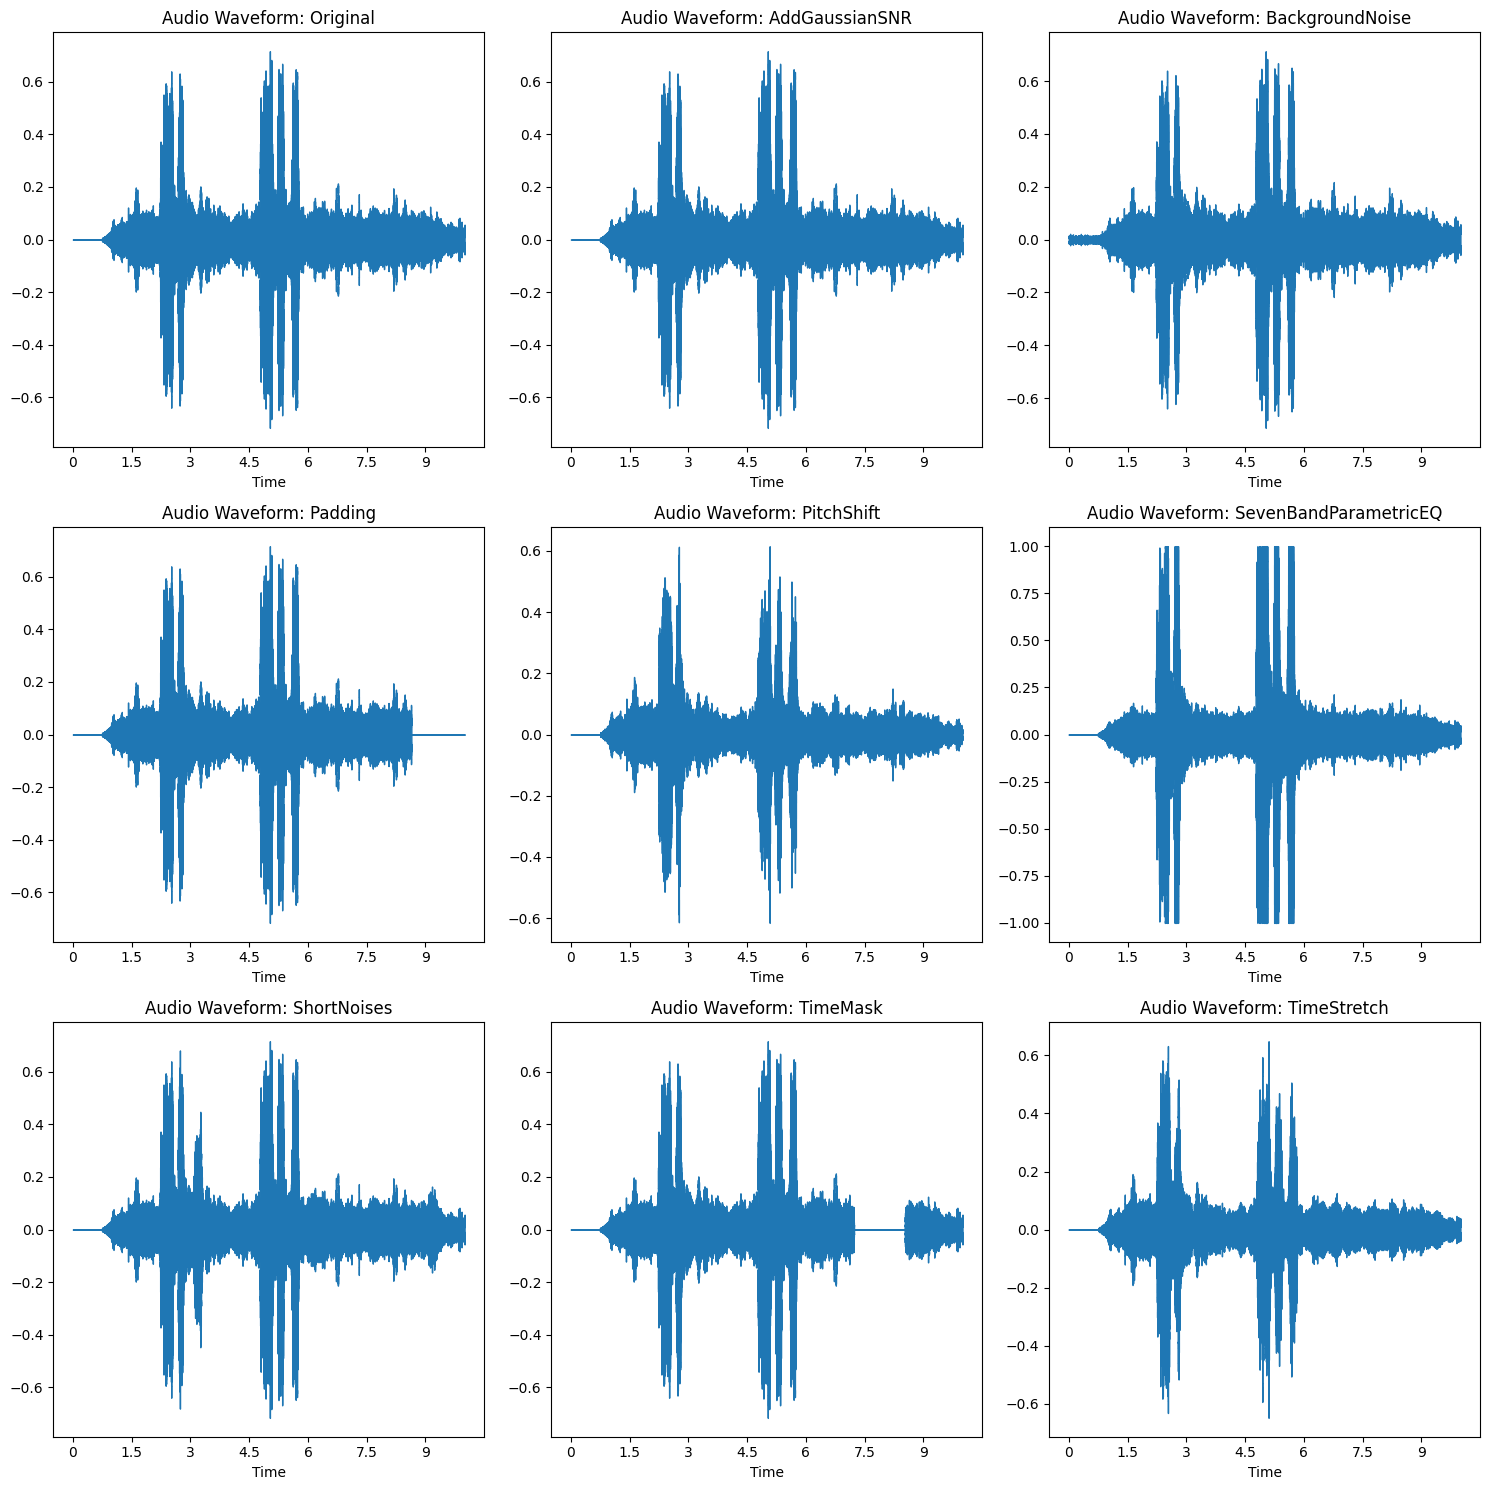

In [4]:
# Function to plot an audio file
def plot_audio(audio_files):
    num_files = len(audio_files)
    
    # Determine the number of rows and columns for the grid
    num_rows = (num_files - 1) // 3 + 1
    num_cols = min(num_files, 3)
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    
    for idx, (title, file_path) in enumerate(audio_files.items()):
        row_idx = idx // num_cols
        col_idx = idx % num_cols
        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        
        y, sr = librosa.load(file_path)
        librosa.display.waveshow(y, sr=sr, ax=ax)
        ax.set_title(f'Audio Waveform: {title}')
    
    # Remove any empty subplots
    for i in range(num_files, num_rows * num_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axes[row_idx, col_idx])
    
    plt.tight_layout()
    plt.show()

# Call the plot_audio function with the files dictionary
plot_audio(files)


Function to plot MelSpectogram for different augmentation types

c:\Users\DELL\anaconda3\envs\dev\lib\site-packages\librosa\feature\spectral.py:2157: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


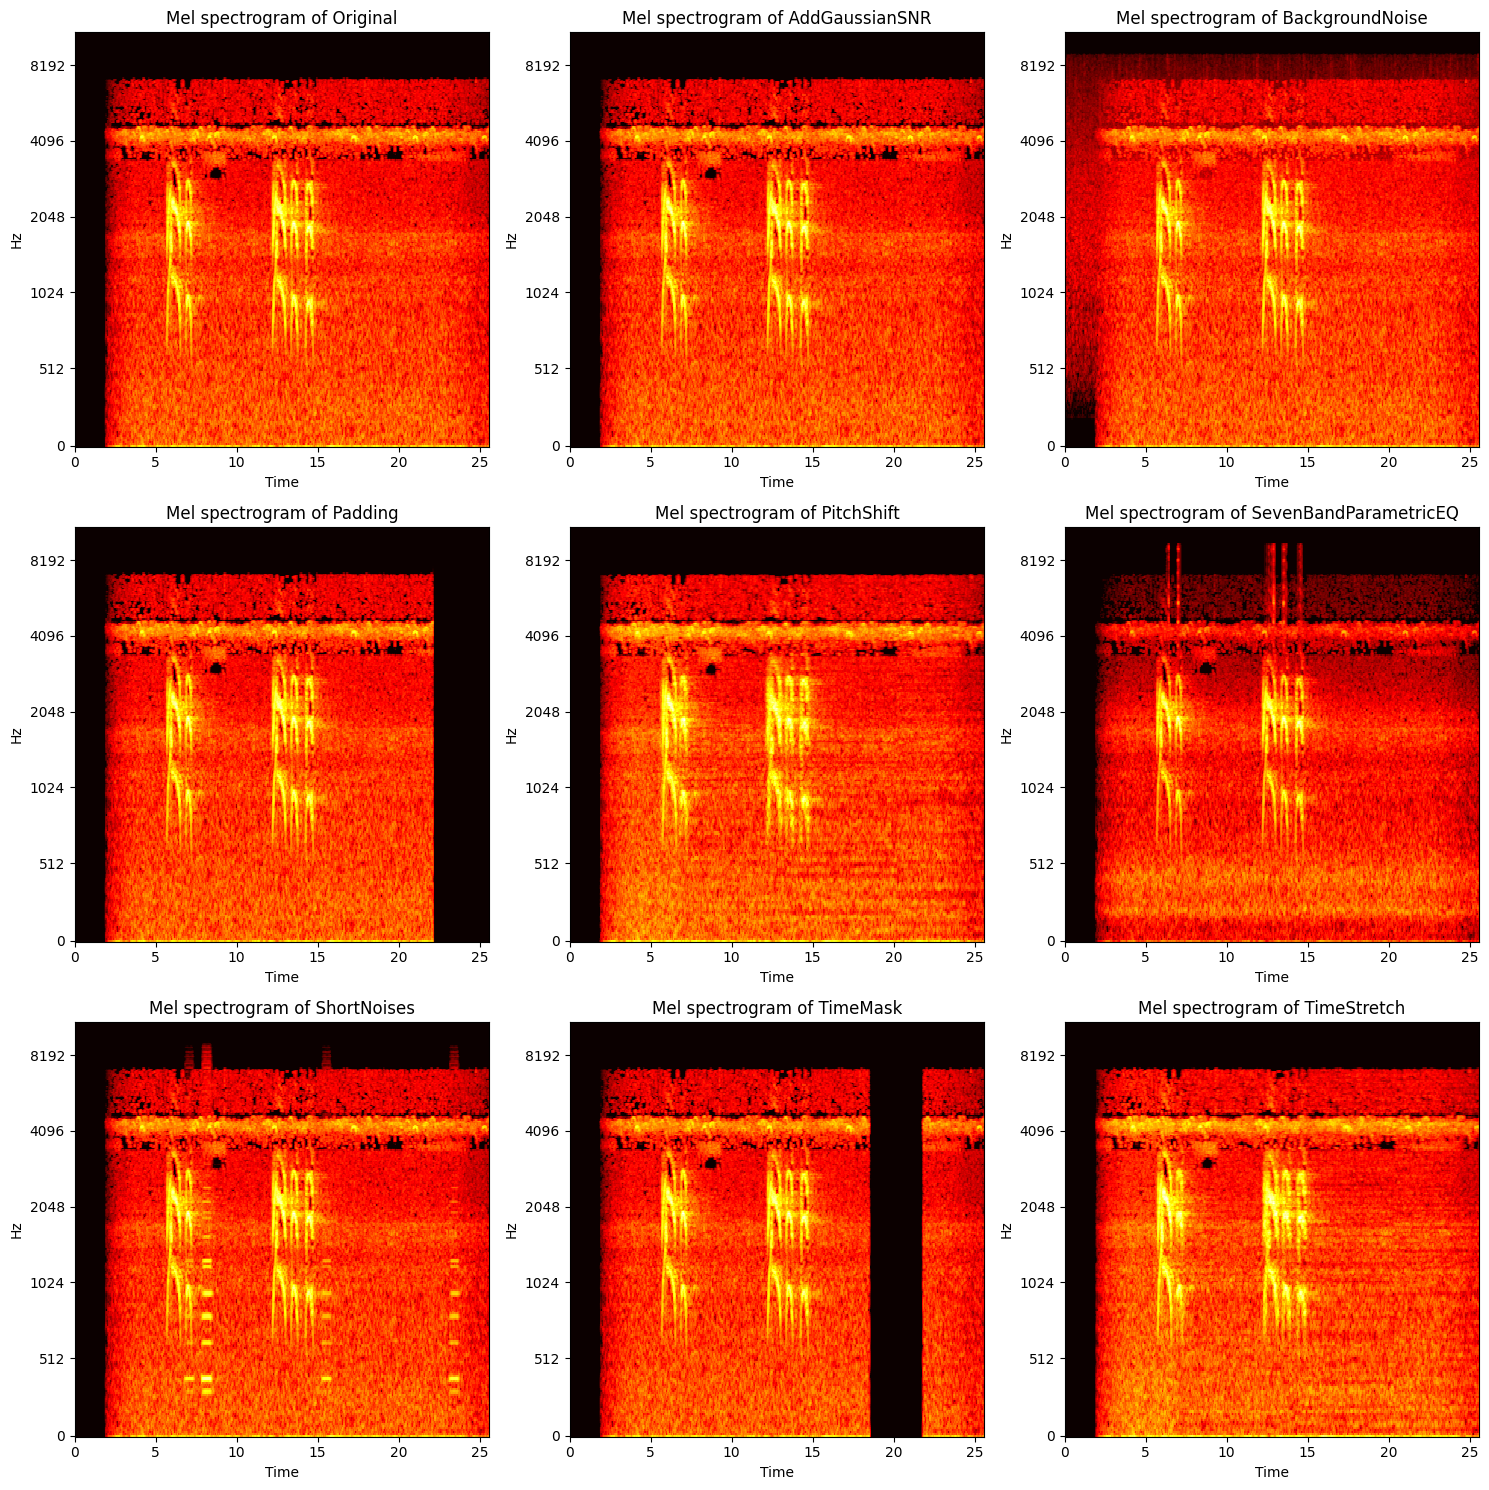

In [5]:
# Function to plot a Mel spectrogram
def plot_melspectrogram(audio_files):
    num_files = len(audio_files)
    
    # Determine the number of rows and columns for the grid
    num_rows = (num_files - 1) // 3 + 1
    num_cols = min(num_files, 3)
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    
    for idx, (title, file_path) in enumerate(audio_files.items()):
        row_idx = idx // num_cols
        col_idx = idx % num_cols
        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        
        lfile, sr = librosa.load(file_path)
        mel_spectrogram = librosa.feature.melspectrogram(y=lfile, sr=sr, n_fft=2048, hop_length=200, n_mels=260, fmin=20, fmax=13000, win_length=None)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        
        librosa.display.specshow(mel_spectrogram, cmap="hot", y_axis="mel", x_axis="time", ax=ax)
        ax.set_title(f"Mel spectrogram of {title}")
    
    # Remove any empty subplots
    for i in range(num_files, num_rows * num_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axes[row_idx, col_idx])
    
    plt.tight_layout()
    plt.show()

plot_melspectrogram(files)


Display Audio for different augmentation types

In [6]:
import IPython.display as ipd
for fkey in files:
    audio, sr = librosa.load(files[fkey], sr=None)
    print(fkey)
    ipd.display(ipd.Audio(audio, rate=sr)) # load 

Original


AddGaussianSNR


BackgroundNoise


Padding


PitchShift


SevenBandParametricEQ


ShortNoises


TimeMask


TimeStretch
